# Implementação de Regressão Polinomial com Gradiente Descendente

O presente código implementa um algoritmo para resolver um problema de regressão polinomial, utilizando o método de gradiente descendente para ajustar os coeficientes de um polinômio que melhor se ajusta a um conjunto de dados fornecidos. Além disso, o código calcula o erro quadrático médio (RMSE) entre os valores reais e os valores preditos e plota os resultados para visualização.

## Implementação

In [1]:
import random
import math
import matplotlib.pyplot as plt

In [2]:
def gerar_sequencia(num_elementos, valor_inicial, valor_final):
    return [round(valor_inicial + (valor_final - valor_inicial) * i / (num_elementos - 1), 3) for i in range(num_elementos)]

In [3]:
def f(a,x):
    n_coef = len(a)
    return sum([a[j] * (x ** (n_coef-1-j)) for j in range(n_coef)])

### Função `grad(a, dx, dy)`

Essa função calcula o gradiente do erro em relação aos coeficientes do polinômio. O erro é medido pela diferença entre os valores reais (`dy`) e os valores previstos pelo polinômio (`f(a, dx)`).

- Parâmetros:
    - `a`: coeficientes atuais do polinômio.
    - `dx`: lista de valores de entrada ($x$).
    - `dy`: lista de valores reais de saída ($y$).
- Retorno:
    - A lista de gradientes para cada coeficiente, que indicam a direção em que devemos ajustar os coeficientes para minimizar o erro.

In [4]:
def grad(a, dx, dy):
    n = len(a)
    grad_a =  [0 for i in range(n)] # grad_a inicial: [0,0,...,0]
    for i in range(len(dx)):
        s = f(a,dx[i])
        g = dy[i] - s
        for k in range(n): #para cada a_k
            grad_a[k] += -2 * g *(dx[i]**(n-k-1))
    return grad_a

### Função `grad_desc(grau, dataset_x, dataset_y, tol, lr)`

Essa função implementa o algoritmo de gradiente descendente para ajustar os coeficientes do polinômio que minimizam o erro quadrático médio entre os valores reais (`dataset_y`) e os valores preditos pelo polinômio.

- Parâmetros:
    - `grau`: grau do polinômio.
    - `dataset_x`: lista de valores de entrada.
    - `dataset_y`: lista de valores reais de saída.
    - `tol`: tolerância para a convergência (critério de parada).
    - `lr`: taxa de aprendizado, que controla o tamanho dos passos durante o ajuste dos coeficientes.

- Retorno:
    - `a_n`: lista de coeficientes ajustados.
    - `count`: número de iterações até a convergência.

In [5]:
def grad_desc(grau, dataset_x, dataset_y, tol, lr):
    coefs = grau + 1
    a_o =  [round(random.uniform(-5, 5), 2) for _ in range(coefs)]
    count = 0
    while True:
        count+=1
        grads = grad(a_o, dataset_x, dataset_y)
        a_n = [a_o[i] - lr * grads[i] for i in range(len(grads))]
        if (math.dist(a_o, a_n) > tol):
            a_o = a_n
        else:
            break
    return a_n, count

### Função `calcular_rmse(dataset_y_real, dataset_y_predito)`
Calcula o erro quadrático médio (RMSE) entre os valores reais e os valores preditos.

- Parâmetros:
    - `dataset_y_real`: lista de valores reais.
    - `dataset_y_predito`: lista de valores preditos pelo modelo.
- Retorno:
    - O valor do RMSE, que quantifica o erro médio entre os valores reais e preditos

In [6]:
# erro quadrático médio (RMSE)
def calcular_rmse(dataset_y_real, dataset_y_predito):
    n = len(dataset_y_real)
    erro_quadratico = sum([(dataset_y_real[i] - dataset_y_predito[i]) ** 2 for i in range(n)])
    return math.sqrt(erro_quadratico / n)

### Função `plotar_resultados(dataset_x, dataset_y_real, dataset_y_predito)`

Essa função plota os resultados, comparando os valores reais com os valores preditos pelo modelo.

- Parâmetros:
    - `dataset_x`: lista de valores de entrada.
    - `dataset_y_real`: lista de valores reais.
    - `dataset_y_predito`: lista de valores preditos.
- Retorno:
    - Exibe um gráfico comparando os valores reais e preditos

In [7]:
def plotar_resultados(dataset_x, dataset_y_real, dataset_y_predito):
    plt.plot(dataset_x, dataset_y_real, label="Valores reais", marker='o')
    plt.plot(dataset_x, dataset_y_predito, label="Valores preditos", linestyle='--', marker='x')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Comparação entre valores reais e preditos')
    plt.legend()
    plt.show()

## Demonstrações

### Para Polinômio de grau 3
A seguir, o código inicializa os coeficientes de um polinômio de grau 3, gera um conjunto de dados, e então aplica o gradiente descendente para encontrar os coeficientes que melhor se ajustam aos dados.

1. A função grad_desc é chamada para ajustar os coeficientes do polinômio.
2. O erro quadrático médio (RMSE) é calculado para avaliar o ajuste.
3. Finalmente, os resultados são plotados.

Coeficientes reais: [-3.4, -1.2, 0.1, -0.1]
Coeficientes obtidos: [-3.39, -1.2, 0.09, -0.1] após 55284 iterações
Erro quadrático médio (RMSE): 0.0026903386082271293


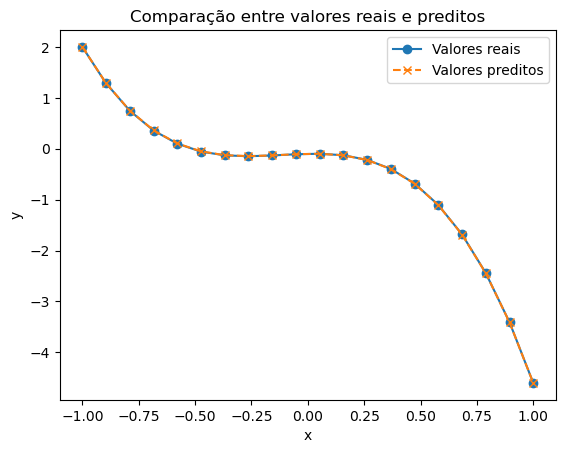

In [8]:
# Parâmetros do problema
GRAU = 3

# Coeficientes reais
a = [round(random.uniform(-5, 5), 1) for _ in range(GRAU + 1)]
print(f"Coeficientes reais: {a}")

# dataset
dataset_x = gerar_sequencia(20, -1, 1)
dataset_y = [f(a, i) for i in dataset_x]

coefs, iteracoes = grad_desc(GRAU, dataset_x, dataset_y, 10 ** (-6), 0.0001)
coefs = [round(i, 2) for i in coefs]
print(f"Coeficientes obtidos: {coefs} após {iteracoes} iterações")

# obtido
dataset_y_predito = [f(coefs, x) for x in dataset_x]

# Calcular o erro quadrático médio (RMSE)
rmse = calcular_rmse(dataset_y, dataset_y_predito)
print(f"Erro quadrático médio (RMSE): {rmse}")

# Plotar os resultados
plotar_resultados(dataset_x, dataset_y, dataset_y_predito)

### Para Polinômio de grau 17
A seguir, o código inicializa os coeficientes de um polinômio de grau 17, gera um conjunto de dados, e então aplica o gradiente descendente para encontrar os coeficientes que melhor se ajustam aos dados.

1. A função grad_desc é chamada para ajustar os coeficientes do polinômio.
2. O erro quadrático médio (RMSE) é calculado para avaliar o ajuste.
3. Finalmente, os resultados são plotados.


**Observação**: Devido ao número elevado de coeficientes (17+1) a entradas estão limitadas em um intervalo de -1 a 1.

Coeficientes reais: [-2.6, -2.7, -1.4, 3.2, 1.0, -0.2, 3.8, -4.3, -1.0, -0.3, -0.9, 3.2, -1.3, 3.6, 4.6, -1.2, 3.1, 1.9]
Coeficientes obtidos: [2.51, -4.16, -2.06, 0.59, -3.51, -0.26, 0.55, 2.04, -2.55, -0.69, 3.73, 3.31, 2.04, 0.55, 0.84, -0.05, 3.75, 1.85] após 472639 iterações
Erro quadrático médio (RMSE): 0.0788207042880006


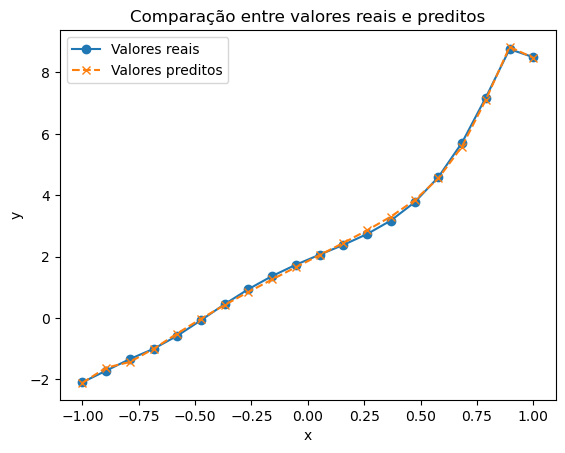

In [10]:
# Parâmetros do problema
GRAU = 17

# Coeficientes reais
a = [round(random.uniform(-5, 5), 1) for _ in range(GRAU + 1)]
print(f"Coeficientes reais: {a}")

# dataset
dataset_x = gerar_sequencia(20, -1, 1)
dataset_y = [f(a, i) for i in dataset_x]

coefs, iteracoes = grad_desc(GRAU, dataset_x, dataset_y, 10 ** (-6), 0.00001)
coefs = [round(i, 2) for i in coefs]
print(f"Coeficientes obtidos: {coefs} após {iteracoes} iterações")

# obtido
dataset_y_predito = [f(coefs, x) for x in dataset_x]

# Calcular o erro quadrático médio (RMSE)
rmse = calcular_rmse(dataset_y, dataset_y_predito)
print(f"Erro quadrático médio (RMSE): {rmse}")

# Plotar os resultados
plotar_resultados(dataset_x, dataset_y, dataset_y_predito)